In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import applications
from keras.models import Sequential
from keras.models import load_model
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint, History  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import time
import imutils
import math
from PIL import Image
import time
from keras.models import load_model
from utils import *




ImportError: cannot import name 'SGD' from 'keras.optimizers' (/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers.py)

In [ ]:
def read_image(/Lombroso_Script/Nato.png):
    image0 = cv2.imread(/Lombroso_Script/Nato.png)
    image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
    return image0

def plot_image(image0, title='Nato'):
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title(title)
    ax1.imshow(image0)
    
def read_image(/Lombroso_Script/LocoMoral.png):
    image1 = cv2.imread(/Lombroso_Script/LocoMoral.png)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    return image1

def plot_image(image1, title='LocoMoral'):
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title(title)
    ax1.imshow(image1)
    
    


In [3]:
def get_faces(image0):
    """
    Devuelve una matriz con las caras detectadas en una imagen.
    Cada cara se define como lo hace OpenCV: x superior izquierda, y superior izquierda, ancho y alto.
    """
    image_copy = np.copy(image0)
    gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

    face_classifier = cv2.CascadeClassifier ('haarcascade_frontalface_alt.xml')
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    
    return faces 

In [5]:
def get_faces(image1):
    image_copy = np.copy(image1)
    gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    
    return faces 

In [6]:
def draw_faces(image0, faces=None, plot=True):
    """
    Traza una imagen con sus rostros detectados. Si no hay, también contabiliza.
    """
    if faces is None:
        faces = get_faces(image0)
    image_with_faces = np.copy(image0)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(image_with_faces, (x,y), (x+w,y+h), (255,0,0), 3)
        
    if plot is True:
        plot_image(image_with_faces)
    else:
        return image_with_faces

In [7]:
def draw_faces(image1, faces=None, plot=True):
    """
    Traza una imagen con sus rostros detectados. Si no hay, también contabiliza.
    """
    if faces is None:
        faces = get_faces(image1)
    image_with_faces = np.copy(image1)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(image_with_faces, (x,y), (x+w,y+h), (255,0,0), 3)
        
    if plot is True:
        plot_image(image_with_faces)
    else:
        return image_with_faces

In [8]:
def plot_image_with_keypoints(image0, image_info):
    """
   Traza los puntos clave dados en formato (x, y)
    """
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    
    for (face, keypoints) in image_info:
        for (x,y) in keypoints:
            ax1.scatter(x, y, marker='o', c='c', s=10)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(image0)

In [9]:
def plot_image_with_keypoints(image1, image_info):
    """
   Traza los puntos clave dados en formato (x, y)
    """
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    
    for (face, keypoints) in image_info:
        for (x,y) in keypoints:
            ax1.scatter(x, y, marker='o', c='c', s=10)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(image1)

In [10]:
image = read_image('Lombroso_Script/Data/Entrenamiento/without_mask_1000.jpg')
faces = get_faces(image)
print("Faces detected: {}".format(len(faces)))
draw_faces(image, faces)

NameError: name 'read_image' is not defined

NameError: name 'plot_data' is not defined

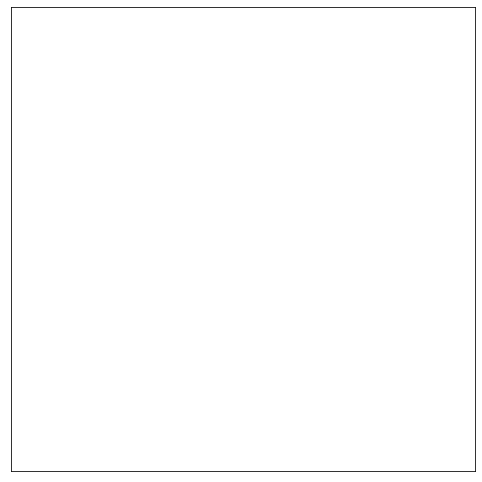

In [12]:
import matplotlib.pyplot as plt
'''Visualización de los datos de entrenamiento'''
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

In [11]:
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

NameError: name 'load_data' is not defined

In [13]:
# Red Convolucional de Keras.

shape = (96,96)
model = Sequential()
model.add(Convolution2D(16,(2,2),padding='same',input_shape=(96,96, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=3))

model.add(Convolution2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))

model.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))

model.add(Convolution2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

In [15]:

def load_data(test=False):
 
    FTRAIN = 'data/training.csv'
    FTEST = 'data/test.csv'
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  

    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    df = df.dropna()  

    X = np.vstack(df['Image'].values) / 255.  
    X = X.astype(np.float32)
    X = X.reshape(-1, 96, 96, 1)

    if not test:  
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  
        X, y = shuffle(X, y, random_state=42) 
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

def plot_data(img, landmarks, axis):
   
    axis.imshow(np.squeeze(img), cmap='gray') 
    landmarks = landmarks * 48 + 48 
    axis.scatter(landmarks[0::2], 
        landmarks[1::2], 
        marker='o', 
        c='c', 
        s=40)

def plot_keypoints(img_path, 
                  face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_alt.xml'),
                  model_path='my_model.h5'):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    ax.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))

    if len(faces) == 0:
        plt.title('no faces detected')
    elif len(faces) > 1:
        plt.title('too many faces detected')
        for (x,y,w,h) in faces:
            rectangle = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
            ax.imshow(cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB))
    elif len(faces) == 1:
        plt.title('one face detected')
        x,y,w,h = faces[0]
        bgr_crop = img[y:y+h, x:x+w] 
        orig_shape_crop = bgr_crop.shape
        gray_crop = cv2.cvtColor(bgr_crop, cv2.COLOR_BGR2GRAY)
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255.
        model = load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=-1), axis=0)))
        ax.scatter(((landmarks[0::2] * 48 + 48)*orig_shape_crop[0]/96)+x, 
                   ((landmarks[1::2] * 48 + 48)*orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=40)
    plt.show()

NameError: name 'cv2' is not defined

In [16]:
epochs = 50
histo = History()

def compile_model(model, epochs):
    
    filepath = 'model.hdf5'
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    checkpointer = ModelCheckpoint(filepath=filepath, 
                                   verbose=1, save_best_only=True)


    hist = model.fit(X_train, y_train, validation_split=0.2,
              epochs=epochs, batch_size=20, callbacks=[checkpointer, histo], verbose=1)
    
    model.save(filepath)
    
    return hist

def show_training_validation_loss(hist, epochs):
    plt.plot(range(epochs), hist.history[
             'val_loss'], 'g-', label='Val Loss')
    plt.plot(range(epochs), hist.history[
             'loss'], 'g--', label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show() 

train_net = False

if train_net is True:
    hist = compile_model(model, epochs) 
else:
    model.load_weights('model.hdf5')
    

if train_net is True:
    show_training_validation_loss(hist, epochs)

NameError: name 'History' is not defined

In [17]:
def get_keypoints(image, faces=None):
    
    result = []
    
    if faces is None:
        faces = get_faces(image)
    faces_shape = (96, 96)
    image_copy = np.copy(image)
    
    for (x,y,w,h) in faces:
        face = image_copy[y:y+h,x:x+w]
        gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        resize_gray_face = cv2.resize(gray_face, faces_shape) / 255
        inputs = np.expand_dims(np.expand_dims(resize_gray_face, axis=-1), axis=0)
                                                     
        predicted_keypoints = model.predict(inputs)
        predicted_keypoints = np.squeeze(predicted_keypoints)
        
        keypoints = []        
        for idx in range(0, len(predicted_keypoints), 2):
            x_scale_factor = face.shape[0]/faces_shape[0] 
            y_scale_factor = face.shape[1]/faces_shape[1] 
            x_center_left_offset = predicted_keypoints[idx] * faces_shape[0]/2 + faces_shape[0]/2 
            y_center_left_offset = predicted_keypoints[idx + 1] * faces_shape[1]/2 + faces_shape[1]/2
            
            x_center = int(x + (x_scale_factor * x_center_left_offset))
            y_center = int(y + (y_scale_factor * y_center_left_offset))

            keypoints.append([x_center, y_center])
        
        result.append([(x,y,w,h), keypoints])
    
    return result

def show_image_and_features(/Lombroso_Script/Nato.png):
    image0 = read_image(/Lombroso_Script/Nato.png)
    faces = get_faces(image0)
    keypoints = get_keypoints(image0, faces)
    image_with_faces = draw_faces(image0, faces ,plot=False)
    plot_image_with_keypoints(image_with_faces, keypoints)

show_image_and_features('/Lombroso_Script/Nato.png')


def show_image_and_features(/Lombroso_Script/LocoMoral.png):
    image1 = read_image(/Lombroso_Script/LocoMoral.png)
    faces = get_faces(image1)
    keypoints = get_keypoints(image1, faces)
    image_with_faces = draw_faces(image1, faces ,plot=False)
    plot_image_with_keypoints(image_with_faces, keypoints)

show_image_and_features('/Lombroso_Script/LocoMoral.png')

SyntaxError: invalid syntax (<ipython-input-17-5d1cb2955648>, line 35)